# 1. 자전거 대여 수요 예측 경진대회 EDA

## 1.1. 데이터 둘러보기

이번에는 캐글에서 직접 작성하지 않고 코랩과 연동시킨 후 데이터를 다운받고 진행코자 한다.

In [ ]:
# 토큰 파일 업로드를 먼저 진행. kaggle.json이라는 파일이 업로드가 되도록 한다.
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xpelqpdj0422","key":"2edebe6c02209895e8d7e00e69b72f16"}'}

In [ ]:
# 파일이 잘 업로드 되었는지 확인을 하기 위해서 다음 코드를 실행해 본다.
# ls -1ha kaggle.json
# 이 때 파일명이 kaggle.json이라고 뜬다면 성공이다.
# 처음 시도할 때는 kaggle.json이라고 잘 뜨지만 이후에 중복 업로드가 될 경우는 이 코드가 오류가 날 수도 있다.
# 오류가 나더라도 이하의 코드를 진행하는 데는 지장이 없긴 하다.

In [ ]:
# Kaggle API를 사용하기 위해 json파일을 ~/.kaggle로 이동시키는 작업이 필요하다.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         53           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         98           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        617           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        125           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1251           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15237           False  
house-pr

In [ ]:
! kaggle competitions download -c bike-sharing-demand     # API를 복사 붙여넣기 하여 파일 다운로드 진행

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 62.6MB/s]


In [ ]:
!ls           # 압축 파일의 목록 확인

bike-sharing-demand.zip  drive	kaggle.json  sample_data


In [ ]:
!unzip bike-sharing-demand.zip               # 해당 파일의 압축을 푸는 과정(unzip)

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# 이제 파일 다운이 완료되었으니 본격적으로 numpy와 pandas를 들여오고 train과 test, sampleSubmission 자료를 지정한다.

import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


캐글과 코랩 연동과정은 https://jaaamj.tistory.com/141 사이트를 참고하였다.  
아니면 파일을 직접 다운로드하여 구글 드라이브에 저장 후 경로 복사를 할 수도 있다.  
저는 캐글과 코랩을 연동시켜서 파일을 불러오는데 성공했다!!!

In [ ]:
train.info()        # train의 자료형태에 관한 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()       # test의 자료형태에 관한 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 1.2. 더 효과적인 분석을 위한 피처 엔지니어링

In [ ]:
print(train['datetime'][100])                # datetime 100번째 인덱스 출력
print(train['datetime'][100].split())        # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0])     # 날짜와 시간으로 나뉘어진 문자열 중 날짜 출력
print(train['datetime'][100].split()[1])     # 날짜와 시간으로 나뉘어진 문자열 중 시간 출력

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [ ]:
print(train['datetime'][100].split()[1])                    # 시간
print(train['datetime'][100].split()[1].split(':'))         # ":" 기준으로 문자열 나누기(시간, 분, 초로 분할)
print(train['datetime'][100].split()[1].split(':')[0])      # 시, 분, 초로 나뉘어진 문자열 중 시간 출력
print(train['datetime'][100].split()[1].split(':')[1])      # 시, 분, 초로 나뉘어진 문자열 중 분 출력
print(train['datetime'][100].split()[1].split(':')[2])      # 시, 분, 초로 나뉘어진 문자열 중 초 출력

09:00:00
['09', '00', '00']
09
00
00


In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성. lambda 함수를 사용하여 간단하게 표현.
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [ ]:
from datetime import datetime                 # datatime 라이브러리 임포트
import calendar

print(train['date'][100])     # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))                               # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())                     # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])  # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [ ]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunder',
                                         4: 'Heavy Snow, Rain, Thunder'})

시즌(계절)의 경우 1은 spring으로, 2는 summer로, 3은 fall로, 4는 winter로 mapping하고,  

날씨의 경우는 1은 clear로, 2는 Mist, Few clouds로, 3은 Light snow, Rain, Thunder로, 4는 'Heavy 

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 1.3. 데이터의 시각화

### 1.3.1. 분포도(displot)

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

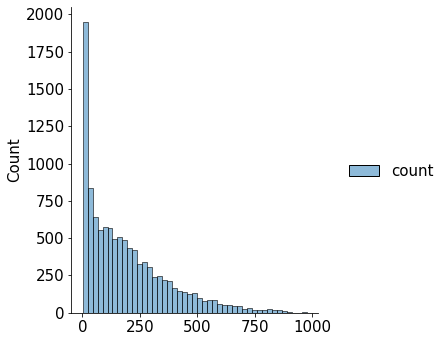

In [ ]:
mpl.rc('font', size=15)                 # 폰트 크기를 15로 설정
sns.displot([train['count']]);          # 분포도 출력

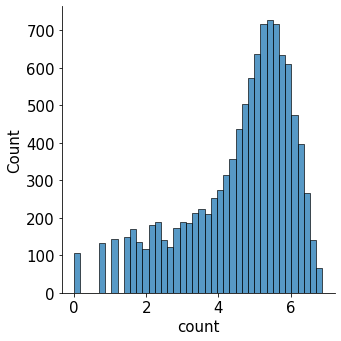

In [ ]:
sns.displot(np.log(train['count']));

### 1.3.2. 막대그래프(barplot)

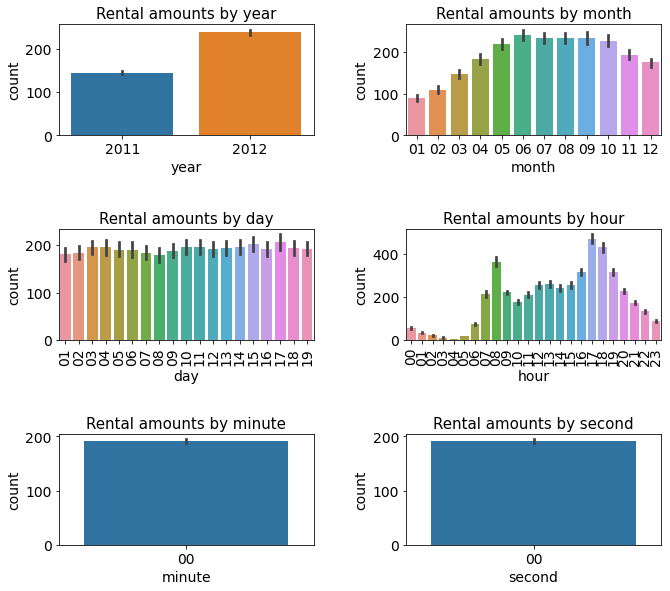

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)                           # 폰트 크기 설정
mpl.rc('axes', titlesize=15)                      # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2)     # 3행 2열 Figure 생성
plt.tight_layout()                                # 그래프 사이에 여백 확보
figure.set_size_inches(10,9)                      # Figure 크기를 10 X 9인치로 설정

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정(서브플롯에 제목 달기)
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

# 1행에 위치한 서브플롯들의 x축 라벨 90도 회전.
# 글자가 겹치는 부분을 깔끔하게 정리해 주는 보조적인 기능
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

### 1.3.3. 박스플롯(boxplot)

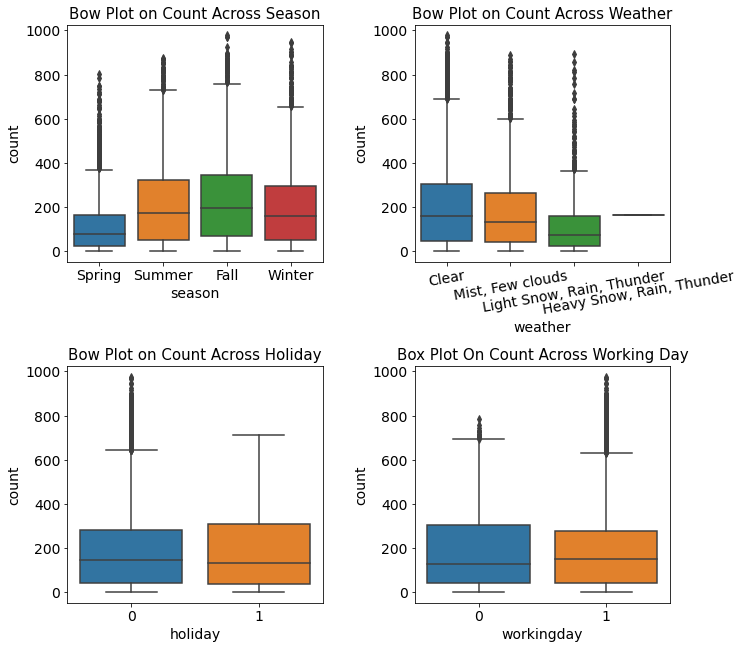

In [ ]:
# 스텝 1 : 2행 2열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)   # 2행 2열 Figiure 생성
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절(season), 날씨(weather), 공휴일(holiday), 근무일별(workingday) 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정(서브플롯에 제목 달기)
axes[0,0].set(title='Bow Plot on Count Across Season')
axes[0,1].set(title='Bow Plot on Count Across Weather')
axes[1,0].set(title='Bow Plot on Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 반시계방향으로 10도 회전

* 박스 플롯의 해석방법을 정리해볼 필요가 있어서 확인해 보고자 한다.
* 박스 플롯에 대한 설명 블로그 : https://codedragon.tistory.com/7012

1) whisker : 상자의 좌우 또는 상하로 뻗어나간 선

2) 박스 내부의 가로선 : 중앙값

3) lower whisker : 최솟값 혹은 '중앙값 - 1.5 X IQR'보다 큰 데이터 중 가장 작은 값

4) upper whisker : 최댓값 혹은 '중앙값 + 1.5 X IQR'보다 큰 데이터 중 가장 큰 값

5) IQR : Inter Quartile Range
 제3사분위수 - 제1사분위수

6) 점 : 이상치 혹은 특이점
 lover whisker보다 작은 데이터 또는 upper whisker보다 큰 데이터가 여기에 해당한다.

제1사분위수, 제3사분위수와 중앙값에 대한 내용이 정리된 블로그 : https://mycodepia.tistory.com/18


### 1.3.4. 포인트플롯(pointplot)

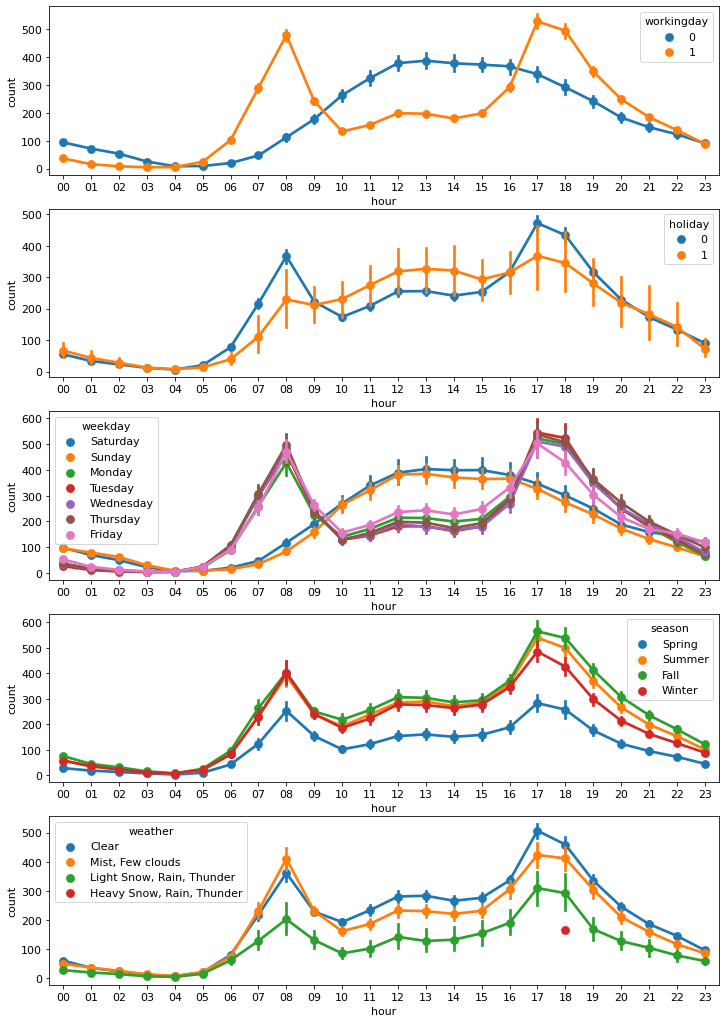

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

참고로 workingday의 0은 주말, 1은 평일을 의미  
holiday의 0과 1은 미국 기준 기념일인 경우에 1을, 나머지의 경우 0으로 표시한다.  
(7월 4일 독립기념일 등등)

### 1.3.5. 회귀선을 포함한 산점도 그래프(regplot)

산점도를 그릴 때는 보통 plt.scatter로 나타내지만 여기에서는 산점도에 회귀선 혹은 추세선을 포함하기 때문에 sns.regplot을 사용해 산점도에 추세선을 표시할 수 있다.



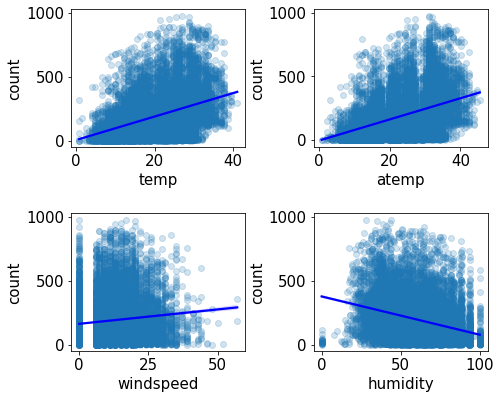

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도(temp), 체감 온도(atemp), 풍속(windspeed), 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

# alpha 값으로 산점도 내 점의 투명도를 조절할 수 있다.
# 0으로 갈수록 산점도 내 점이 투명해지고 1로 갈수록 선명해진다.(따라서 0과 1 사이의 값만 넣을 수 있다.)

### 1.3.6. 히트맵(heatmap)

In [ ]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()   # corr을 통해 5가지 특성 간의 상관관계를 확인해 볼 수 있다.

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


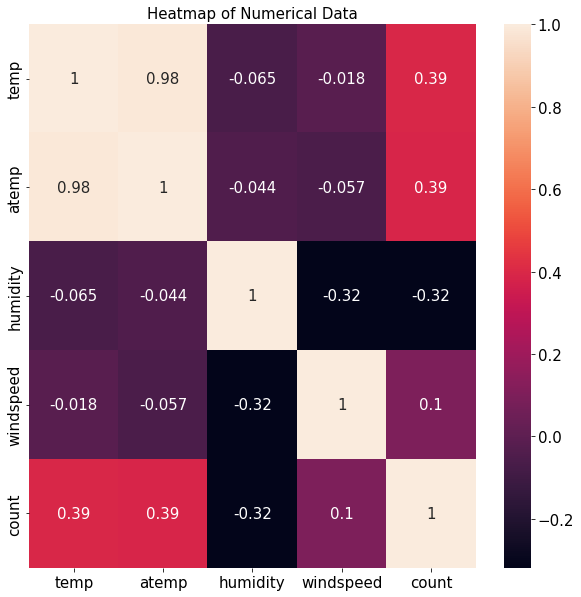

In [ ]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)    # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

# 2. 자전거 대여 수요 예측 경진대회 베이스라인 모델

In [ ]:
import pandas as pd

# 데이터 경로
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
# 이상치 제거. 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

In [ ]:
# 데이터 합치기. train + test
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [ ]:
all_data = pd.concat([train, test], ignore_index=True)

In [ ]:
# 파생 변수(피처) 추가

from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])   # 날짜 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])    # 연도 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])   # 월 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])    # 시 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())   # 요일 피처 생성

all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0


In [ ]:
# 필요 없는 피처 제거

drop_features = ['casual', 'holiday', 'registered', 'datetime', 'date', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)
all_data

,season,workingday,weather,temp,atemp,humidity,count,year,month,hour,weekday
0,1,0,1,9.84,14.395,81,16.0,2011,01,00,5
1,1,0,1,9.02,13.635,80,40.0,2011,01,01,5
2,1,0,1,9.02,13.635,80,32.0,2011,01,02,5
3,1,0,1,9.84,14.395,75,13.0,2011,01,03,5
4,1,0,1,9.84,14.395,75,1.0,2011,01,04,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,1,2,10.66,12.880,60,NaN,2012,12,19,0
17374,1,1,2,10.66,12.880,60,NaN,2012,12,20,0
17375,1,1,1,10.66,12.880,60,NaN,2012,12,21,0
17376,1,1,1,10.66,13.635,56,NaN,2012,12,22,0


In [ ]:
# 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값


In [ ]:
X_train.head()

,season,workingday,weather,temp,atemp,humidity,year,month,hour,weekday
0,1,0,1,9.84,14.395,81,2011,01,00,5
1,1,0,1,9.02,13.635,80,2011,01,01,5
2,1,0,1,9.02,13.635,80,2011,01,02,5
3,1,0,1,9.84,14.395,75,2011,01,03,5
4,1,0,1,9.84,14.395,75,2011,01,04,5


In [ ]:
# 평가지표 계산 함수 작성
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
  # 지수변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

  # 로그변환 후 결측값을 0으로 변환
  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  # RMSLE 계산
  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

## 2.3. 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression    # Linear 회귀모델 불러들임

linear_reg_model = LinearRegression()

In [ ]:
log_y = np.log(y)                     # 타깃값 로그변환              
linear_reg_model.fit(X_train, log_y)  # 모델 훈련
print(lr.intercept_) 

LinearRegression()

# 2.4. 모델 성능 검증

In [ ]:
preds = linear_reg_model.predict(X_train)

In [ ]:
print(f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0187


RMSLE는 Root Mean Square Logarithmic Error로 로그를 취한 양의 각각을 제곱한 값의 평균치를 나타낸 것이다.이를 이해하려면 RMSE를 먼저 아는 것이 중요하다.

RMSE는 예측값과 실제값의 차(더하기/빼기) 각각을 제곱(square)한 값을 평균(mean)을 내서, 루트(root)를 씌운 것이다. 제곱하고 다시 루트를 씌웠으니, 그 값의 단위는 예측값과 실제값의 차이의 단위와 같다. 예측하는 대상이 "미터" 단위의 길이라면, RMSE 값의 단위도 "미터" 일 것이다.

RMSLE 는 어떤 양의 log 값이다. 생각하기 어려운 log 를 없애려면, 역함수인 exp 를 취하면 된다. exp(RMSLE) 는 앞 문단에서 설명한 XX와 같은 단위이다. 다시 말해보자, exp(RMSLE) 는 실제값과 예측값의 비율이다.

RMSLE의 정의 참조 블로그 : https://daewonyoon.tistory.com/281

## 2.5. 예측 및 결과 제출

In [ ]:
linearreg_preds = linear_reg_model.predict(X_test)  # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)       # 지수변환
submission.to_csv('first_submission.csv', index=False)  # 파일로 저장 
submission.head()                                        

,datetime,count
0,2011-01-20 00:00:00,10.521027
1,2011-01-20 01:00:00,12.569849
2,2011-01-20 02:00:00,13.937106
3,2011-01-20 03:00:00,15.074023
4,2011-01-20 04:00:00,16.713666


여기까지 정상적으로 했다면 'Output/kaggle/working'에 first_submission.csv가 생성되었을 것이다. 이 파일을 다운로드 받아서 직접 대회에 제출하고 평가 점수를 살펴볼 수도 있다고 한다.

# 3. 자전거 대여 수요 예측 경진대회 모델 성능 개선

## 3.1 선행 작업 및 피처 엔지니어링

In [ ]:
# 판다스 임포트 및 데이터 경로 불러들이기
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

In [ ]:
# 이상치 제거
train = train[train['weather'] != 4]

In [ ]:
# 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [ ]:
# 파생 변수(피처) 추가
from datetime import datetime

# 날짜, 연도, 월, 시간, 요일 피처 각각 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [ ]:
# 필요없는 피처 제거
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

In [ ]:
# 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

In [ ]:
# 평가지표 계산 함수 작성
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 3.2. 성능 개선 I : 릿지 회귀 모델

### 3.2.1. 하이퍼 파라미터 최적화(모델 훈련)

In [ ]:
# 모델 생성(릿지 모델)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [ ]:
# 그리드서치 객체 생성
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter' : [3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,     # 릿지 모델
                                      param_grid=ridge_params,   # 값 목록
                                      scoring=rmsle_scorer,       # 평가지표
                                      cv=5)                      # 교차검증 분할 수

In [ ]:
# 그리드서치 수행
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)   # 훈련(그리드서치)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [ ]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 3.2.2. 성능 검증

In [ ]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


## 3.3. 성능 개선 II : 라쏘 회귀 모델

### 3.3.1. 하이퍼 파라미터 최적화(모델 훈련)

In [ ]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


### 3.3.2. 성능 검증

In [ ]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


## 3.4. 성능 개선 III : 랜덤 포레스트 회귀 모델

### 3.4.1. 하이퍼 파라미터 최적화 및 모델 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()

rf_params = {'random_state':[42], 'n_estimators':[100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


### 3.4.2. 모델 성능 검증

In [ ]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


### 3.4.3. 예측 및 결과 제출

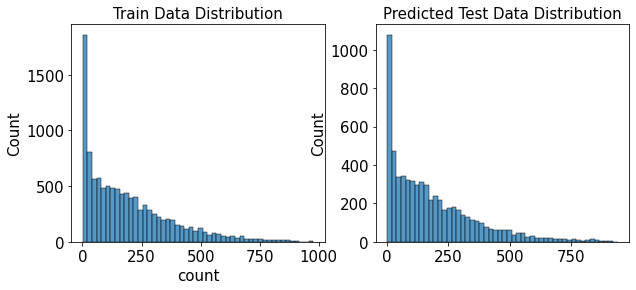

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('second_submission.csv', index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.127016
1,2011-01-20 01:00:00,4.981274
2,2011-01-20 02:00:00,3.209022
3,2011-01-20 03:00:00,3.503956
4,2011-01-20 04:00:00,2.680269



여기까지 정상적으로 했다면 'Output/kaggle/working'에 second_submission.csv가 생성되었을 것이다. 이 파일을 다운로드 받아서 직접 대회에 제출하고 평가 점수를 살펴볼 수도 있다고 한다. 모델 개선을 했기 때문에 더 높은 점수를 기대해도 좋을 거 같다.

# 4. 회고

이번주는 필사 후 저장된 파일을 직접 캐글에 제출하여 점수를 확인해 보면서 자신이 어느 수준의 모델링 능력이 있는지 알아보는 시간이었던 거 같다. 점수를 더 올리기 위해서는 아래와 같은 Tip을 참고하면 좋다고 한다.

1. 성능향상을 위한 추가적인 EDA 고민
2. feature에 대한 분석, 생성, 제거작업 추가진행
3. 모델 종류에 대한 고민
4. 모델 최적화에 대한 고민

* 1번과 2번 항목, 즉 성능향상을 위한 EDA 고민 및 feature에 대한 분석, 생성, 제거작업은 이전에 캐글 필사 과제였던 다이타닉 과제를 비롯하여 몇 차례 연습을 한 덕분에 많이 익숙해 질 수 있었다.  
* 그러나 3번과 4번 항목, 즉 모델 종류와 최적화에 대한 내용은 아직 숙지가 되지 않았고 따라서 어느 모델이 성능이 더 뛰어날지에 대한 고민이 필요해 보였다.   
* 이번 주 과제 결과를 보면 랜덤 포레스트 회귀모델이 가장 성능이 좋은 모델이라고 하겠지만 자료들이 품고 있는 feature에 따라서 다르기 때문에 모델이라는 것은 상대적인 개념이라고 할 수 있다. 그에 따라서 적절한 모델이 무엇일까를 계속 공부해야 겠다고 생각했다. 